In [3]:
import pandas as pd
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
df.shape

(1000, 7)

In [6]:
df.isnull().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

,0
Brand,object
Processor_Speed,float64
RAM_Size,int64
Storage_Capacity,int64
Screen_Size,float64
Weight,float64
Price,float64


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2,2.780555,8,256,12.679356,3.750265,9149.521832
997,2,3.200569,4,512,12.666315,3.392612,16552.404779
998,1,1.604182,8,256,11.215581,3.857613,9407.473459


In [10]:
x = df.drop(columns='Price')
y = df.Price

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Decision Tree Regression**

In [12]:
dtr = DecisionTreeRegressor(criterion='squared_error',min_samples_split=4,max_depth=1000)
dtr.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=1000, min_samples_split=4)

In [13]:
y_pred = dtr.predict(x_test)

In [14]:
print("MSE : ",mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("R Squared : ",r2_score(y_test, y_pred))

MSE :  74928.26962815088
RMSE :  273.7302862822287
MAE :  220.72095248499485
R Squared :  0.9991747674461914


In [15]:
dtr_r2 = r2_score(y_test, y_pred)

# Random Forest Regression

In [16]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

print("MSE : ",mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("R Squared : ",r2_score(y_test, y_pred))

MSE :  40098.91885265552
RMSE :  200.2471444307147
MAE :  163.07662266968643
R Squared :  0.9995583651754676


In [17]:
rfr_r2 = r2_score(y_test, y_pred)

# **Support Vector Regression**

In [18]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

print("MSE : ",mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("R Squared : ",r2_score(y_test, y_pred))

MSE :  82191499.73783822
RMSE :  9065.952776064865
MAE :  7385.571399006492
R Squared :  0.09477288656704641


In [19]:
svr_r2 = r2_score(y_test, y_pred)

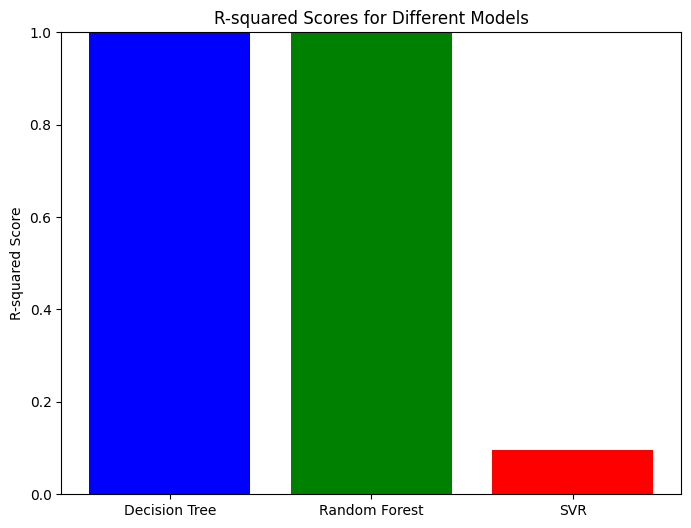

In [20]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'SVR']
r2_scores = [dtr_r2, rfr_r2, svr_r2]

plt.figure(figsize=(8,6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models')
plt.ylim(0, 1)
plt.show()

In [21]:
    import joblib
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(rfr, 'random_forest_model.pkl')

['random_forest_model.pkl']